# Step1 : import all libaries needed

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# step2: importing csv file and create a data frame

In [3]:
df = pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Step3 :Shape of data

In [8]:
df.shape
# this means there are 9994 records and 13 features

(9994, 13)

In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Step4 : checking for any missing values 

In [11]:
# checking if there are missing values and how many
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# step5: checking for correlation

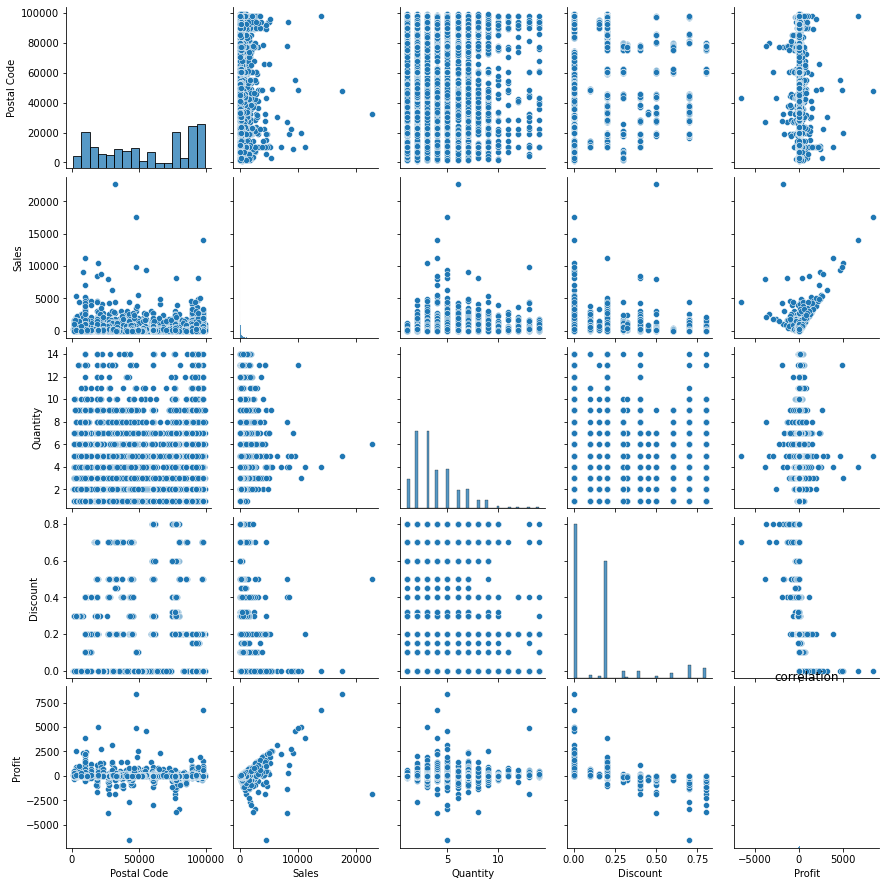

In [12]:
sns.pairplot(df)
plt.title("correlation")
plt.show()

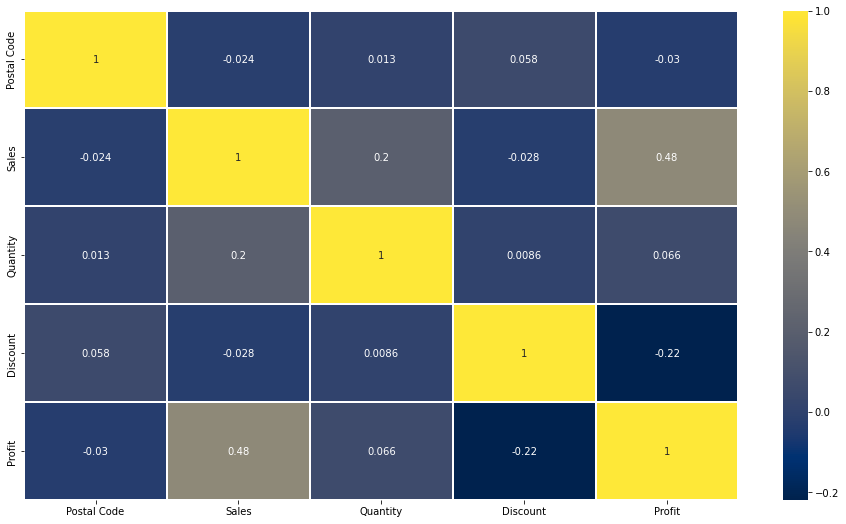

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap = 'cividis',linewidth = 0.30,annot =True)
plt.show()

# Step6: exploring city features

In [14]:
cities = df["City"].unique()

In [17]:
len(cities)
#there are 531 cities

531

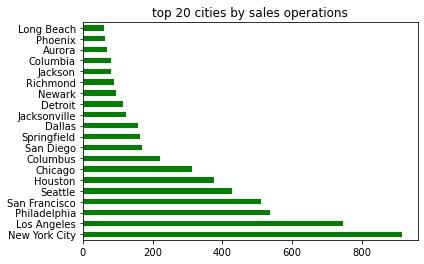

In [23]:
# Note:-every row of data represent a sales event
df.City.value_counts()[:20].plot(kind="barh",color="g")
plt.title("top 20 cities by sales operations")
plt.show()

# looking for how many cities generated profit and how many generated loss

In [14]:
negative_cities=[]
positive_cities=[]
profit_of_cities=[]
loss_of_cities=[]
for city in df["City"].unique():
    if df['Profit'][df["City"]==city].mean()<=0:
        negative_cities.append(city)
        loss_of_cities.append(df['Profit'][df["City"]==city].mean())
    else:
        positive_cities.append(city)
        profit_of_cities.append(df['Profit'][df["City"]==city].mean())

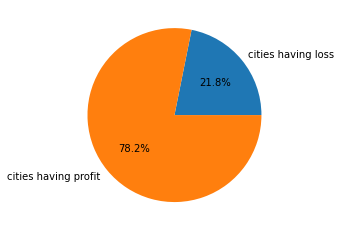

In [15]:
plt.pie([len(negative_cities),len(positive_cities)],labels = ["cities having loss","cities having profit"],autopct="%1.1f%%")
plt.show()

In [40]:
print(len(negative_cities),len(positive_cities),sep = "\n\n")

116

415


# which city is at the top in respect to profit & which city is at the top in respect to loss

In [46]:
df2 = pd.DataFrame(list(zip(positive_cities,profit_of_cities)),columns = ["city_name","avg_profit"]).sort_values(by="avg_profit",ascending=True)

In [17]:
df3 = pd.DataFrame(list(zip(positive_cities,profit_of_cities)),columns = ["city_name","avg_loss"]).sort_values(by = "avg_loss",ascending = False)

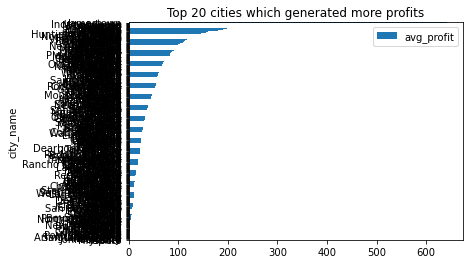

In [40]:
df2.plot(kind = "barh",x = "city_name",y ="avg_profit")
plt.title("Top 20 cities which generated more profits")
plt.show()

In [ ]:
# need to correct somethings above

# exploring state feauture

In [24]:
states=df["State"].unique()

In [26]:
len(states)
# there are 49 states

49

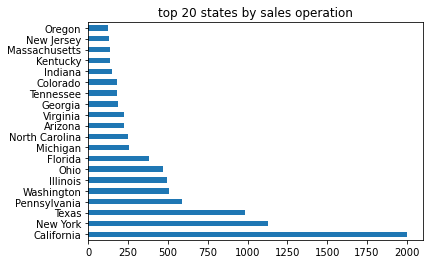

In [27]:
df.State.value_counts()[:20].plot(kind ='barh')
plt.title("top 20 states by sales operation")
plt.show()
# california is a top state regarding sales 

In [33]:
# how many state generate profit and how many state generate loss
negative_states=[]
positive_states=[]
profit_of_states=[]
loss_of_states=[]
for state in df["State"].unique():
    if df['Profit'][df["State"]==state].mean()<=0:
        negative_states.append(state)
        loss_of_states.append(df['Profit'][df["State"]==state].mean())
    else:
        positive_states.append(state)
        profit_of_states.append(df['Profit'][df["State"]==state].mean())

In [34]:
len(negative_states)# there are 10 states generating loss

10

In [37]:
len(positive_states)# there are 39 states generating profit

39

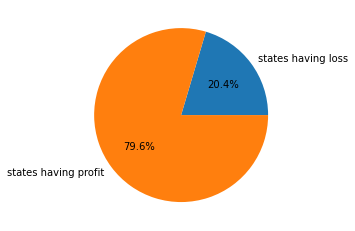

In [38]:
plt.pie([len(negative_states),len(positive_states)],labels = ["states having loss","states having profit"],autopct="%1.1f%%")
plt.show()

# exploring country feauture

In [4]:
df["Country"].unique()
#it means the sales was performed only in USA

array(['United States'], dtype=object)

# exploring category feature

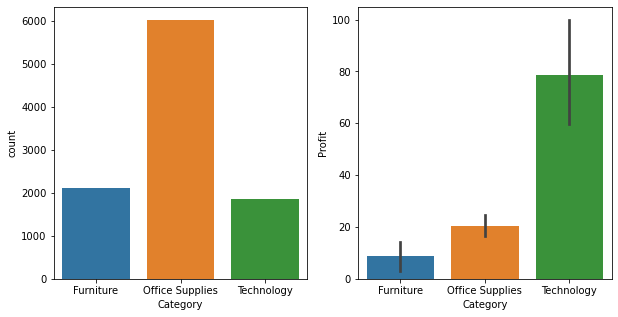

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="Category",data=df)
plt.subplot(1,2,2)
sns.barplot(x="Category",y="Profit",data=df)
plt.show()
#looking for categoryof things at the top in respect to investment and generating more profit

## left bar chart shows that things in office category are the most sold in office operation

## right bar chart shows things of tecnology are the ones with the most generated profit

## result:tecnology are less sold but are more profitable

# Exploring ship mode feature

## looking for which type of ship mode is mostly used in  sales  event and how it affects profit

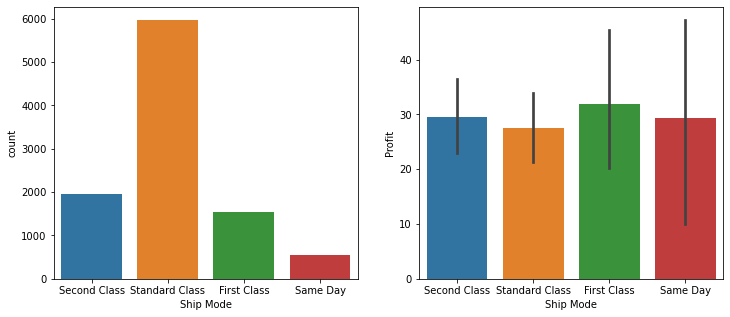

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x="Ship Mode",data= df)
plt.subplot(1,2,2)
sns.barplot(x="Ship Mode",y="Profit",data= df)
plt.show()

# left bar chart shows that standard class is used the most in sales operations
# right barchart shows that every class of ship mode as almost the same effect on sales 
# result:- the shipmode  doesnt necessarily affect the profit

# EXPLORING SEGMENT FEATURE

## looking for whuch segment is used most in sales and  which kind of segment generates more profit

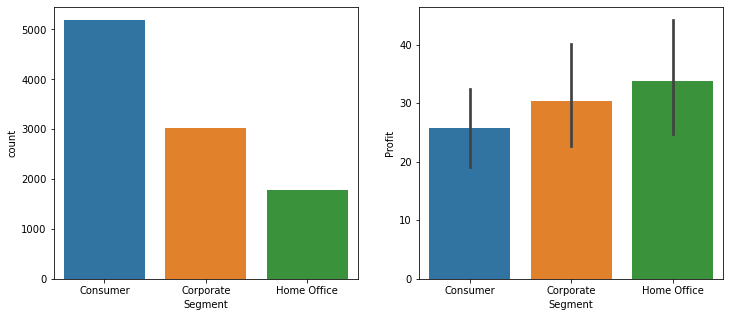

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x="Segment",data= df)
plt.subplot(1,2,2)
sns.barplot(x="Segment",y="Profit",data= df)
plt.show()
# consumer segment is mostly used in sales but home office generates more profit

# EXPLORING REGION FEATURE

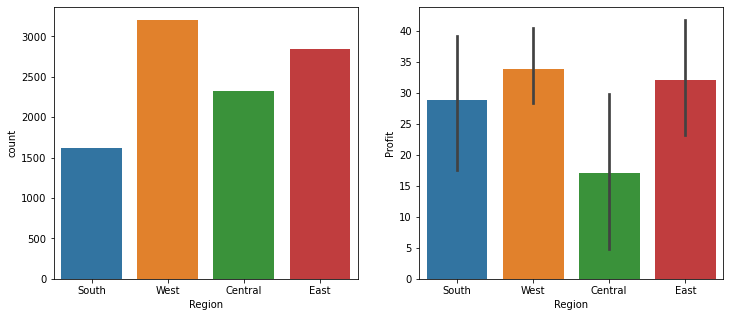

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x="Region",data= df)
plt.subplot(1,2,2)
sns.barplot(x="Region",y="Profit",data= df)
plt.show()

## left barchart shows west region is mostly used in sales and accumulates more profit but varies slightly  from the east region

# Exploring sub-category feature 

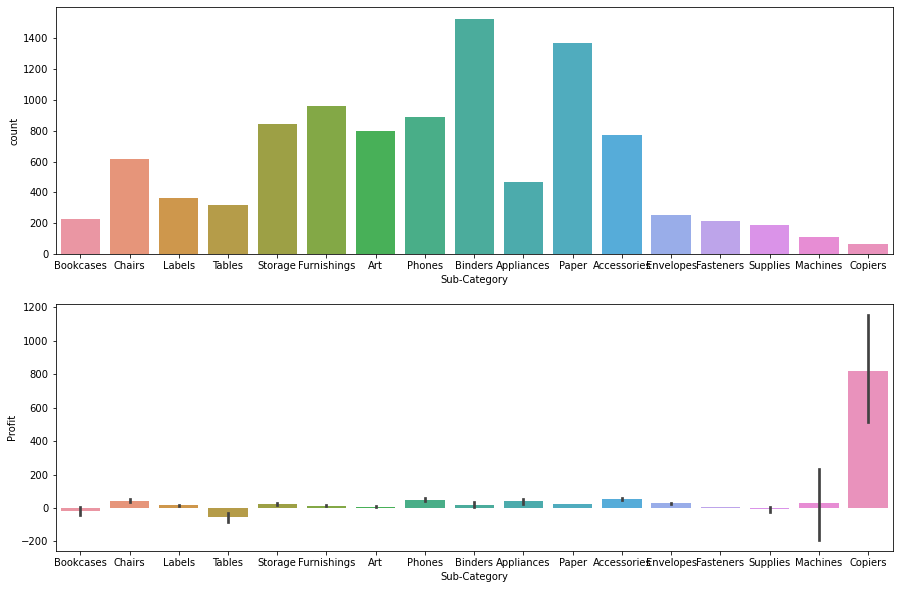

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(x="Sub-Category",data= df)
plt.subplot(2,1,2)
sns.barplot(x="Sub-Category",y="Profit",data= df)
plt.show()

## upper barchart shows Binders (sub-category) are mostly used in sales but the lower barchart  copiers generates more profit

# Exploring quantity feature 

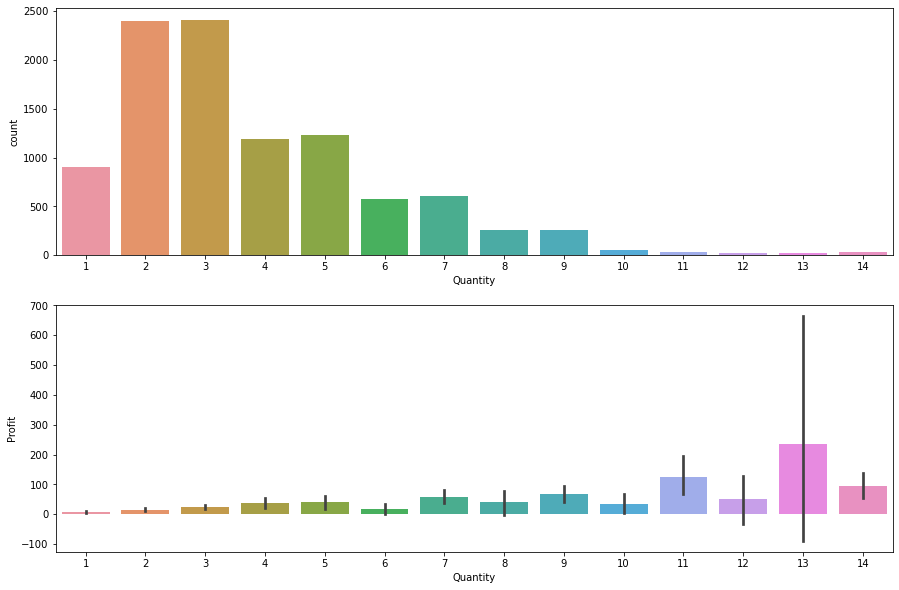

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(x="Quantity",data= df)
plt.subplot(2,1,2)
sns.barplot(x="Quantity",y="Profit",data= df)
plt.show()

## upper barchart shows quantity 2&3 are used mostly in sales but 11 and 13 in the lower barchart generates more profit

# checking if there is increase in quantity how does it affect profit(increase or decrease)?

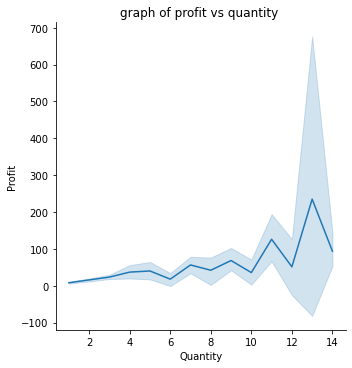

In [17]:
sns.relplot(x="Quantity",y="Profit",data=df,kind="line")
plt.title("graph of profit vs quantity ")
plt.show()

## if the quantity increases then there will be more profit added looking at the graph above

# Exploring discount feature 

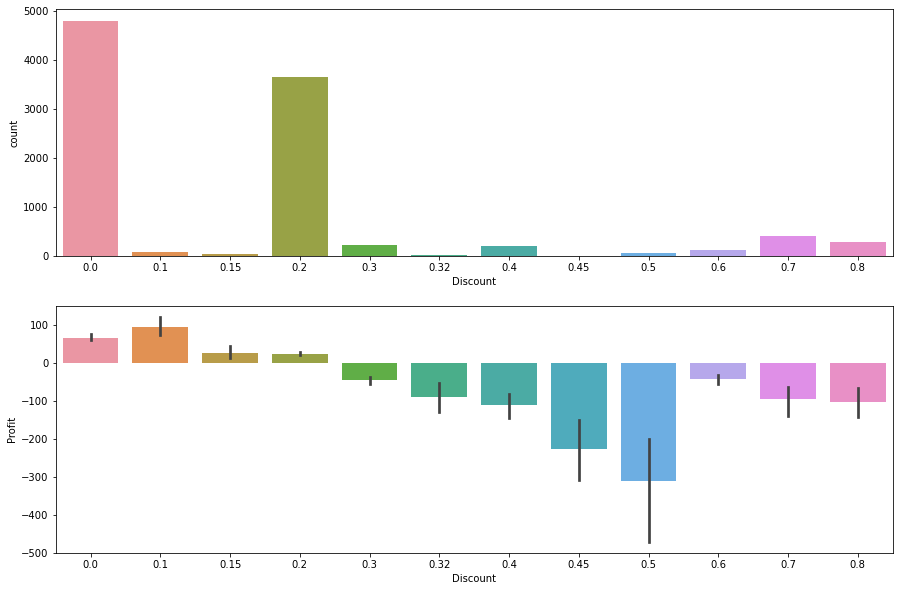

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(x="Discount",data= df)
plt.subplot(2,1,2)
sns.barplot(x="Discount",y="Profit",data= df)
plt.show()

# it shows that if discount is more than 20% it doesnt genrate much profit

# looking at the relationship between profit and discount

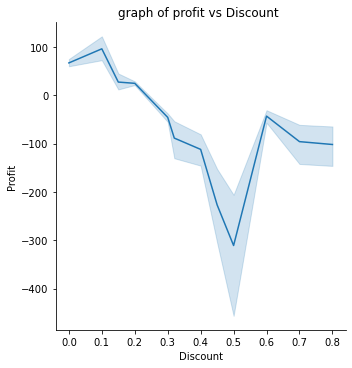

In [21]:
sns.relplot(x="Discount",y="Profit",data=df,kind="line")
plt.title("graph of profit vs Discount ")
plt.show()

# result:- it shows that discount affects profit negatively

# exploring sales feature

C:\Users\GBENGA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


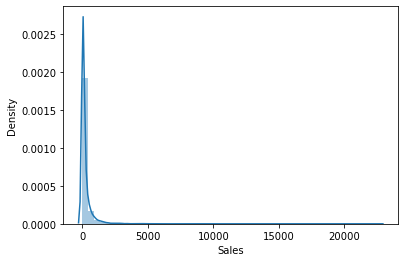

In [23]:
sns.distplot(df["Sales"])
plt.show()
# hsitogram shows that most of sales operationare performed to 0 sales 

# relationship between profit and sales

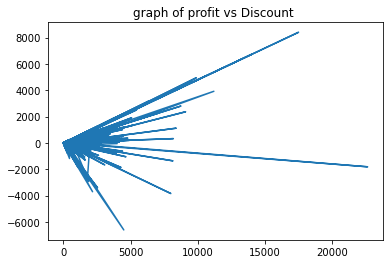

In [25]:
plt.plot(df["Sales"],df["Profit"])
plt.title("graph of profit vs Discount ")
plt.show()

# Conclusion
## there are 8 recommendations or Suggestions to generate more profit

# 1. Discount:- we have to limit our dicount from 0 to 10%

# 2. Category:- we have increase the sales of things under technology category

# 3. Sub-category :- we have to increase  sales of things under copliers sub-category

# 4. Segment:- we have to choose home office segment to generate more profit

# 5. Quantity:- quantity of items should be between one to eleven 
# 6. Sales:- we have to increase our sales to take more profit 
# 7. Cities and states :-there are 116cities and 10 state that generates loss we have to reduce our sales operation in those places 
# 8. Region :- central region generates less pofit so we have to reduce our sales operation there